In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
#The data files are too large to include into GitHub; in lieu of the data files the urls are included 
#from urllib.request import urlretrieve

#url = 'https://www.kaggleusercontent.com/kf/6000333/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..B58nn0fGw2_AfLSPo_PMcg.4po8i1ICqqmBzFyT7dXX_jXhKCflg_I4m1LdlVcJ7-D3AaH8hDNtxo1iOJPsAkzjpntT2RzF-VxuRM4I8DPUZbW-x5vOR2YpJ_eWqdT8ZOVv7TiBnTPthwu_L92-nmFL7WogoIwcwiV2OzxD9PXRUn33yqwV6kdUFLjdY-9RNQQ.jfw9yKFaN8HIncTpy-dhUg/news_train_df.csv'
#urlretrieve(url, 'news_train_df.csv')

#url2 = 'https://www.kaggleusercontent.com/kf/6000566/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..5zNpyCaa5P2pyTRRFYiffA.dns6H4tT5OifalwaHf7C749MZCHhdcYuKX5_vF6XXT1gJiHgVRBmzR1Mk63wlI7H9VFOeWbkRIg21bY84Gdpzi9xEm6t6OtyX97Q14rQPKyJIEH2iA3jLh4bJaHC17RMViIM72NO8X0D0cos_1H-dKVpOy-RexiVWurqcTnH-TSgux4zR_v6jw3cD-oz4XhA.np7o1HJs2MWYK35lXbDvyg/market_train_df.csv'
#urlretrieve(url2, 'market_train_df.csv')

In [2]:
#Load data: Load both the merged data and the original unaltered data 
merged_file = '../DataSet/merged_data.csv'
data = pd.read_csv(merged_file, parse_dates =[1])

#market_file = '../DataSet/market_clean.csv'
#data = pd.read_csv(market_file, parse_dates =[1])

#news_file = '../DataSet/news_train_df.csv'
#news_data = pd.read_csv(news_file, parse_dates =[1])


In [4]:
data.columns

Index(['Unnamed: 0', 'time', 'assetCode', 'assetName', 'volume', 'close',
       'open', 'returnsClosePrevRaw1', 'returnsOpenPrevRaw1',
       'returnsClosePrevMktres1', 'returnsOpenPrevMktres1',
       'returnsClosePrevRaw10', 'returnsOpenPrevRaw10',
       'returnsClosePrevMktres10', 'returnsOpenPrevMktres10',
       'returnsOpenNextMktres10', 'universe'],
      dtype='object')

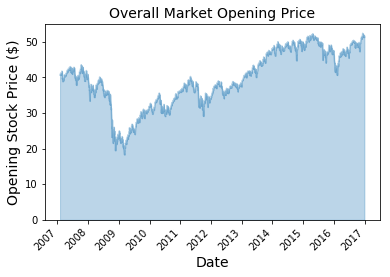

In [13]:
#Calculate the overall market data trends
market_open = data.groupby('time').mean().open
market_open.plot.area(alpha = 0.3)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Opening Stock Price ($)', fontsize = 14)
plt.title('Overall Market Opening Price', fontsize = 14)
plt.xticks(rotation = 45)
plt.savefig('OpenPrice_Overall.png', bbox_inches = 'tight')
plt.show()

# Data Description
The data set contains the merged stock market and news data for different companies.  Within the data set are features such as opening and closing stock prices for each day the market was open (and additional market data).  It also contains information about the news feeds from each date.  Some examples of news data include news feed headline, organization reporting the news, and metrics indicated the sentiment of the news feed toward the company the news is about; sentiment metrics include positive, negative and neutral sentiment values and a sentiment class to indicate the resulting sentiment classification (i.e. is the news positive, negative or neutral toward the company in question).  Below the columns for the data set are shown to display all of the features available to work with.  In the Two Sigma competition on Kaggle the metric used in judging is returnsOpenNextMktres10.  This is the 10 day market return residual which is a measurement of how the stock prices changes from the date it is associated with to 10 days in the future.  Hence, a positive value indicates an increase in the stock price over 10 days while a negative value indicates a decrease in stock prices. 

In [11]:
data.columns

Index(['Unnamed: 0', 'time', 'assetCode', 'assetName', 'volume', 'close',
       'open', 'returnsClosePrevRaw1', 'returnsOpenPrevRaw1',
       'returnsClosePrevMktres1', 'returnsOpenPrevMktres1',
       'returnsClosePrevRaw10', 'returnsOpenPrevRaw10',
       'returnsClosePrevMktres10', 'returnsOpenPrevMktres10',
       'returnsOpenNextMktres10', 'universe', 'sourceTimestamp',
       'firstCreated', 'sourceId', 'headline', 'urgency', 'takeSequence',
       'provider', 'subjects', 'audiences', 'bodySize', 'companyCount',
       'headlineTag', 'marketCommentary', 'sentenceCount', 'wordCount',
       'assetCodes', 'firstMentionSentence', 'relevance', 'sentimentClass',
       'sentimentNegative', 'sentimentNeutral', 'sentimentPositive',
       'sentimentWordCount', 'noveltyCount12H', 'noveltyCount24H',
       'noveltyCount3D', 'noveltyCount5D', 'noveltyCount7D', 'volumeCounts12H',
       'volumeCounts24H', 'volumeCounts3D', 'volumeCounts5D',
       'volumeCounts7D'],
      dtype='object')

# Stock Prices Over Time for Agilent Technology Inc

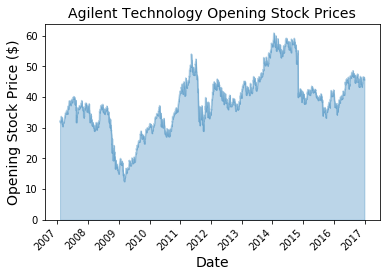

In [14]:
#Visualize the opening stock data for single company
x = data[data.assetName == 'Agilent Technologies Inc'].set_index('time')
#y = data[data.assetName == 'Agilent Technologies Inc'].open
x = x.open

x.plot.area(alpha = 0.3)

plt.xlabel('Date', fontsize = 14)
plt.ylabel('Opening Stock Price ($)', fontsize = 14)
plt.title('Agilent Technology Opening Stock Prices', fontsize = 14)
plt.xticks(rotation = 45)
plt.savefig('OpenPrice.png', bbox_inches = 'tight')
plt.show()


Here an example company is choosen to be used for display of individual company data.  In this case Agilent Technology Inc. is used.  Above the opening stock price for the company is shown versus time.  As seen in the plot the stock prices tend to look like they are noisy from day-to-day with long term trends being the predominate trends.  For instance, we see that from day-to-day the price may increase or decrease but generally there are no major changes short term.  However, in major events such as the 2008 depression a large drop in the stock price is seen over the course of a year.  The challenge moving forward is to look a news data to predict both the short term and long term trends.  From this graph it is clear that short term trends may be more difficult to predict because of the general noisy nature of day-to-day trading.

# 10 Day Market Return Residual for Agilent Technology Inc

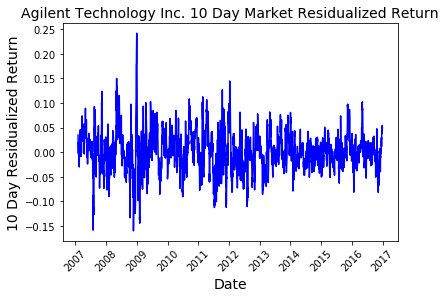

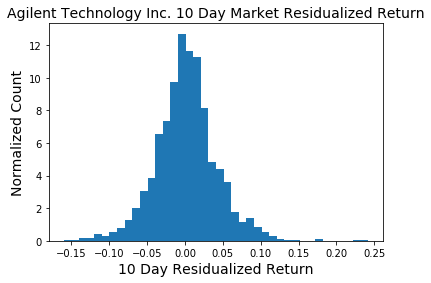

In [4]:
#Time series plot of data for 10 day market return
x = data[data.assetName == 'Agilent Technologies Inc'].time
y = data[data.assetName == 'Agilent Technologies Inc'].returnsOpenNextMktres10
plt.plot(x, y, color = 'blue')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('10 Day Residualized Return', fontsize = 14)
plt.title('Agilent Technology Inc. 10 Day Market Residualized Return', fontsize = 14)
plt.xticks(rotation = 45)
plt.savefig('10DayMarketTimeSeries.png', bbox_inches = 'tight')
plt.show()



#Histogram of returns market data for 10 days
x = data[data.assetName == 'Agilent Technologies Inc'].returnsOpenNextMktres10
plt.hist(x, bins = 40, density=True)
plt.xlabel('10 Day Residualized Return', fontsize = 14)
plt.ylabel('Normalized Count', fontsize = 14)
plt.title('Agilent Technology Inc. 10 Day Market Residualized Return', fontsize = 14)
plt.savefig('10DayMarketHist.png', bbox_inches = 'tight')
plt.show()


Here the 10 day market return residual is graphed versus the date.  This value is indicative of the amount the stock price changes over the course of 10 days.  As seen the value fluctuates wildly from day-to-day.  If instead the 10 day market return residual is graphed as a histogram we see that the value looks nearly normal about a value of 0.  The distribution actually looks slightly skewed to larger values which makes sense.  Because the stock prices ultimately increased over the timeframe in which the data was taken one would expect that there would be more values of the 10 day market return residual that are positive.  For this particular stock the overall stock price increased over the timeframe hence the distribution is skewed to larger values of the residual.

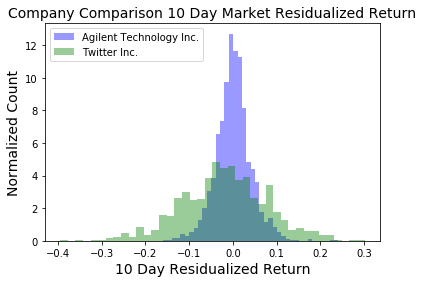

In [5]:
#Histogram of returns market data for 10 days
x2 = data[data.assetName == 'Twitter Inc'].returnsOpenNextMktres10
plt.hist(x, bins = 40, density=True, alpha = 0.4, color = 'blue')
plt.hist(x2, bins = 40, density=True, alpha = 0.4, color = 'green')
plt.xlabel('10 Day Residualized Return', fontsize = 14)
plt.ylabel('Normalized Count', fontsize = 14)
plt.title('Company Comparison 10 Day Market Residualized Return', fontsize = 14)
plt.legend(['Agilent Technology Inc.', 'Twitter Inc.'])
plt.savefig('10DayMarketHistAgTwitter.png', bbox_inches = 'tight')
plt.show()


Here is an example of a stock with a very different market trend.  Ultimately Twitter Inc. stock dropped over time.  When comparing the 10 day market return residual of Twitter to Agilent Technology we see that Twitter has a similar skewed distribution except it is skewed toward negative values.  Again, this makes sense because the stock price of Twitter Inc. dropped over time and therefore there should be a tendancy for the distribution of the residual to be negative.

# 10 Day Market Return for Different Companies

C:\Users\jjjon\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


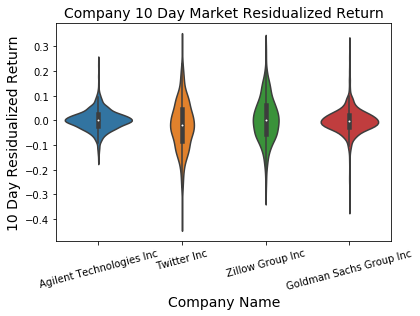

In [6]:
#Create violine plots of 10 day market return data
data_temp = pd.concat([data[data.assetName == 'Agilent Technologies Inc'],
                      data[data.assetName == 'Twitter Inc'],
                      data[data.assetName == 'Zillow Group Inc'],
                      data[data.assetName == 'Goldman Sachs Group Inc']])

sns.violinplot(x = 'assetName', y = 'returnsOpenNextMktres10', data = data_temp)
plt.ylabel('10 Day Residualized Return', fontsize = 14)
plt.xlabel('Company Name', fontsize = 14)
plt.title('Company 10 Day Market Residualized Return', fontsize = 14)
plt.xticks(rotation = 15)
plt.savefig('ViolinReturn.png', bbox_inches = 'tight')
plt.show()


Even better than comparing just two company histograms, we can make violin plots of the 10 day market return residual for several different companies.  Notice, many companies are nearly symmetric about zero but are slightly skewed depending on if the company stock had increased or decreased over time.  Also, the range of the residual values vastly varies depending on company.  This poses an additional challenge because it suggests that some companies are more prone to dramatic changes than others which signifies voliatility.  Also, if one wanted to use such information to make money off of short trading then the long term trends would be less important.  For instance, Twitter ultimately lost stock value over time however there is larger variance in the 10 day market return residual which means if one could predict that metric perfectly then more money could be made from Twitter stock than Agilent Technology stock.

# News Sentiment

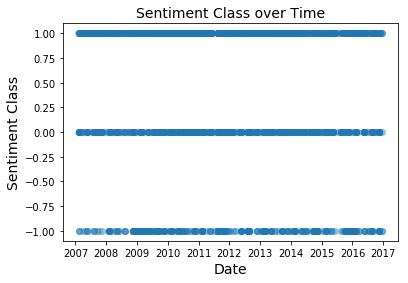

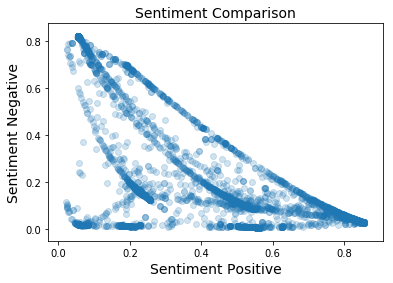

In [12]:
#Visualize the sentimentNegative versus the sentimentPositive data
y = data[data.assetName == 'Agilent Technologies Inc'].sentimentClass
x = data[data.assetName == 'Agilent Technologies Inc'].time

plt.plot_date(x, y, alpha = 0.2)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Sentiment Class', fontsize = 14)
plt.title('Sentiment Class over Time', fontsize = 14)
plt.savefig('SentimentClassTime.png', bbox_inches = 'tight')
plt.show()


#Visualize the sentimentNegative versus the sentimentPositive data
y = data[data.assetName == 'Agilent Technologies Inc'].sentimentNegative
x = data[data.assetName == 'Agilent Technologies Inc'].sentimentPositive

plt.scatter(x, y, alpha = 0.2)
plt.xlabel('Sentiment Positive', fontsize = 14)
plt.ylabel('Sentiment Negative', fontsize = 14)
plt.title('Sentiment Comparison', fontsize = 14)
plt.savefig('PosNeg.png', bbox_inches = 'tight')
plt.show()


Here the sentiment class is shown over time.  The values of 1, 0 and -1 correspond to a news segment with a sentiment of positive, neutral and negative toward Agilent Technology Inc.  Notice, that over time there seems to be more positive news segments than negative news segments.  Otherwise, the graphic is unremarkable.  The sentiment values are explicitly be compared as well.  The sentiment positive and sentiment negative values (both of which range from 0 to 1.0) are shown for all news segments related to Agilent Technology Inc.  Notice, generally a high sentiment positive values corresponds to a lower sentiment negative value and vice-versa.  This makes sense because if an article has a high positive sentiment then one would expect that there is less of a negative sentiment associated with it.  However, some news articles are not clearly positive or negative based on these values.  Hence, when the sentiment class is chosen there are a fraction of articles that are either neutral or can are not clearly positive or negative toward Agilent Technology Inc.  This is a compounding factor that will come into explainations for errors in any predictive model that would be developed later one.

# Sentiment Positive versus 10 Day Market Return Residual

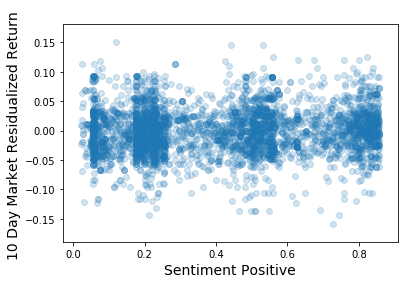

In [5]:
#Visualize the Open Market next 10 days return versus the sentimentPositive data
y = data[data.assetName == 'Agilent Technologies Inc'].returnsOpenNextMktres10
x = data[data.assetName == 'Agilent Technologies Inc'].sentimentPositive

plt.scatter(x, y, alpha = 0.2)
plt.xlabel('Sentiment Positive', fontsize = 14)
plt.ylabel('10 Day Market Residualized Return ', fontsize = 14)
plt.savefig('PosReturn.png', bbox_inches = 'tight')
plt.show()


If one were simply trying to find a relationship between news segment sentiment and the 10 day market return residual then the first step would be to visualize the data.  Notice, when graphically observing sentiment positive and 10 day market return residual there is no apparent correlation.  Though it makes sense that these two variables would be correlated this graphic suggests that the correlation is much more complex than a simple linear trend.

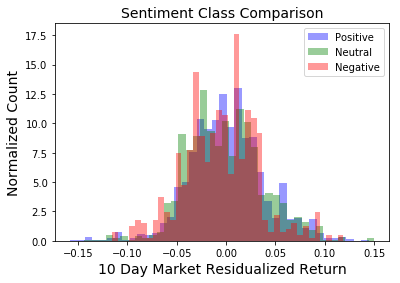

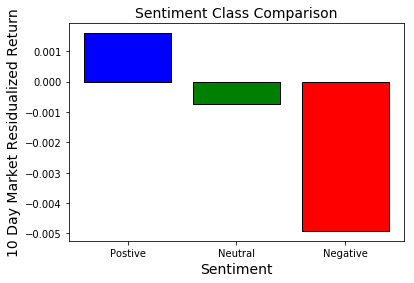

In [3]:
#Visualize the Open Market next 10 days return versus the sentimentPositive data
x = data[data.assetName == 'Agilent Technologies Inc']
x1 = x[x.sentimentClass == 1].returnsOpenNextMktres10
x2 = x[x.sentimentClass == 0].returnsOpenNextMktres10
x3 = x[x.sentimentClass == -1].returnsOpenNextMktres10

plt.hist(x1, bins = 40, density=True, alpha = 0.4, color = 'blue')
plt.hist(x2, bins = 40, density=True, alpha = 0.4, color = 'green')
plt.hist(x3, bins = 40, density=True, alpha = 0.4, color = 'red')
plt.xlabel('10 Day Market Residualized Return', fontsize = 14)
plt.ylabel('Normalized Count', fontsize = 14)
plt.title('Sentiment Class Comparison', fontsize = 14)
plt.legend(['Positive', 'Neutral', 'Negative'])
plt.savefig('Sentiment10DayHist.png', bbox_inches = 'tight')
plt.show()


plt.title('Sentiment Class Comparison', fontsize = 14)
plt.bar(['Postive','Neutral','Negative'], [x1.mean(), x2.mean(), x3.mean()], \
        color = ['blue', 'green', 'red'], edgecolor = 'black')
plt.xlabel('Sentiment', fontsize = 14)
plt.ylabel('10 Day Market Residualized Return', fontsize = 14)
plt.savefig('SentimentBar10day.png', bbox_inches = 'tight')
plt.show()


Here the distribution of 10 day market return residuals is graphed for each sentiment class (positive, neutral and negative).  Notice, there are slight difference between these distributions however to the naked eye the differences are subtle.  This again, speaks to the necessity of more complex modeling to uncover the differences between different types of news reports.  The mean of the residual is also calculated for each sentiment class and displayed as a bar chart above.  As one logically expects, a positive news sentiment has a positive mean residual and a negative news segment has a mean negative residual.  The neutral news segments have a slightly negative residual but not as significantly negative as the negative news segment.

# 10 Day Market Return Residual For News Providers

C:\Users\jjjon\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


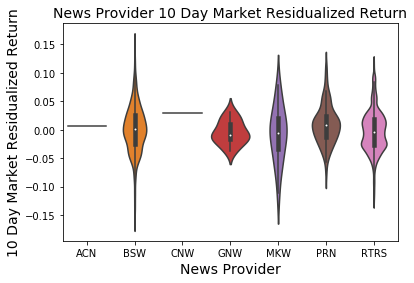

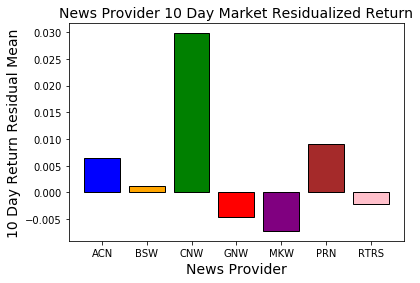

In [4]:
provider_set = data.provider.unique()
company_return = data[data.assetName == "Agilent Technologies Inc"].sort_values('provider')

sns.violinplot(x = 'provider', y = 'returnsOpenNextMktres10', data = company_return)
plt.xlabel('News Provider', fontsize = 14)
plt.ylabel('10 Day Market Residualized Return', fontsize = 14)
plt.title('News Provider 10 Day Market Residualized Return', fontsize = 14)
plt.savefig('ReturnNewsViolin.png', bbox_inches = 'tight')
plt.show()


return_group = company_return.groupby('provider').mean()['returnsOpenNextMktres10']

plt.bar(return_group.index, return_group.values, \
       color = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink'], edgecolor = 'black')
plt.xlabel('News Provider', fontsize = 14)
plt.ylabel('10 Day Return Residual Mean', fontsize = 14)
plt.title('News Provider 10 Day Market Residualized Return', fontsize = 14)
plt.savefig('ReturnNewsBars.png', bbox_inches = 'tight')
plt.show()


We can take a step further and look at the effect of the news organization on the 10 day market return residual.  Notice, the residual distribution is different for different news organization.  When taking the mean 10 day market return residual for each news organization for Agilent Technology Inc. there is a relatively tight range of residual values.  CNW, which is the largest mean value is probably not a good idicator because there were very few data points going into that calculation.  If we exclude that news provider then the remaining news providers show residual absolute values within 0.01.  This is small compared to the range of residual values shown in the violin plot in section "10 Day Market Return for Different Companies."  This suggests that no given news organization was involved with large changes in stock prices compared to other providers.

# Sentiment Classification For News Providers

C:\Users\jjjon\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


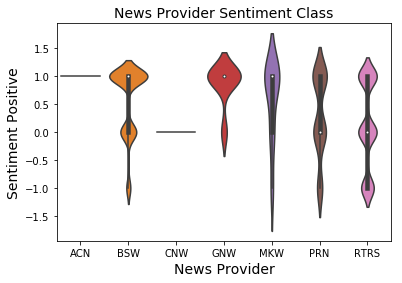

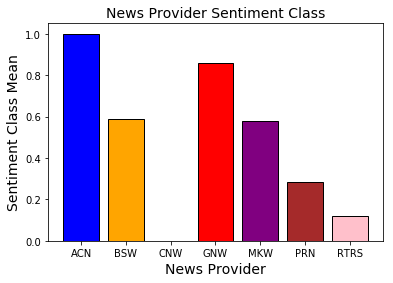

provider
ACN     1.000000
BSW     0.588957
CNW     0.000000
GNW     0.857143
MKW     0.578947
PRN     0.285714
RTRS    0.120658
Name: sentimentClass, dtype: float64


In [16]:
sns.violinplot(x = 'provider', y = 'sentimentClass', data = company_return)
plt.xlabel('News Provider', fontsize = 14)
plt.ylabel('Sentiment Positive', fontsize = 14)
plt.title('News Provider Sentiment Class', fontsize = 14)
plt.savefig('SentimentNewsViolin.png', bbox_inches = 'tight')
plt.show()


return_group = company_return.groupby('provider').mean()['sentimentClass']

plt.bar(return_group.index, return_group.values, \
        color = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink'], edgecolor = 'black')
plt.xlabel('News Provider', fontsize = 14)
plt.ylabel('Sentiment Class Mean', fontsize = 14)
plt.title('News Provider Sentiment Class', fontsize = 14)
plt.savefig('SentimentNewsBars.png', bbox_inches = 'tight')
plt.show()


print(return_group)

Here the news sentiment class is shown for different news providers for Agilent Technology Inc.  Remember, 1, 0 and -1 correspond to positive, neutral and negative news segment respectively.  Once again, the violin plots clearly show that there is a wide distribution of news sentiment classes between the news organizations.  For instance, GNW only has positive and neutral news segments on Agilent Technology Inc. while RTRS looks like there is almost an even split between positive, neutral and negative news segments.  When taking the mean of the sentiment classes it is seen that all of the news agencies had either neutral or positive news segments on average about Agilent Technology Inc.  This is probably a testament to the company itself rather than a bias in the news.  As can be seen in the bar chart, even though all news organization were on average positive about the company there was a varying degree to how positive they were.  Once again, comparing GNW to RTRS it is seen that on average the sentiment score of 0.857 was associated with GNW while RTRS had an average sentiment score of 0.121.  Considering different news organization bias and their effect of the market will be something to consider moving forward in the modeling.

# Sentiment For Different News Providers

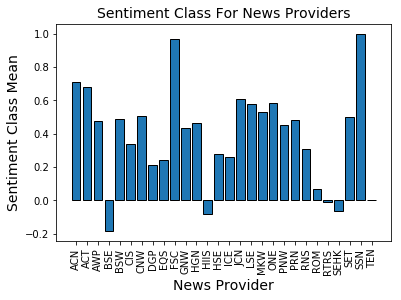

In [17]:
#Find the average serntimentClass for each news organization
news_sentimentClass = data.groupby('provider').mean()['sentimentClass']

plt.bar(news_sentimentClass.index, news_sentimentClass.values, edgecolor = 'black')
plt.xlabel('News Provider', fontsize = 14)
plt.ylabel('Sentiment Class Mean', fontsize = 14)
plt.title('Sentiment Class For News Providers', fontsize = 14)
plt.xticks(rotation = 90)
plt.savefig('NewsSentimentMean.png', bbox_inches = 'tight')
plt.show()


Above is a bar graph of the average sentiment class for each news organization.  Remember, a sentiment class of 1, 0 and -1 correspond to a positive, neutral and negative sentiment.  Ultimately, a vast majority of news organization have a average sentiment class above 0 which indicates that these news organizations are largely positive in reporting news about companies.  This is similar to the result in which news providers were largely positive toward Agilent Technology Inc.  Notice, there are significantly more news providers overall than the ones that were reporting on Agilent Technology Inc.  This indicates that news organization are selective as to what companies to report on and there may also be a few companies that only reported very few times.  For instance, TEN has an average sentiment class of 1.0 which means that it is entirely positive.  Most likely it is that TEN only reported the news a few times in the dataset and those articles all happened to be positive.

# Number of News Segments per News Provider

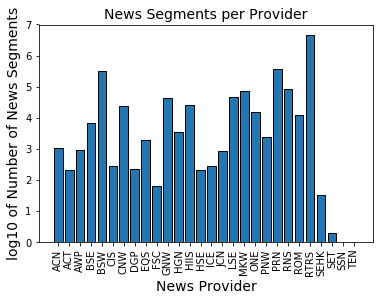

In [18]:
#Find the number of news stories reported by each news organization
news_num = data['provider'].value_counts().sort_index()

plt.bar(news_num.index, np.log10(news_num.values), edgecolor = 'black')
plt.xlabel('News Provider', fontsize = 14)
plt.ylabel('log10 of Number of News Segments', fontsize = 14)
plt.title('News Segments per Provider', fontsize = 14)
plt.xticks(rotation = 90)
plt.savefig('NewsArticleNum.png', bbox_inches = 'tight')
plt.show()

Here the number of news segments per news provider is shown as a bar chart.  Notice, because of the wide distribution the $log10$ of the number of news segments is taken and displayed on the chart.  Notice, that RTRS provides an order of magnitude more articles than any other news provider.  While SSN and TEN have barely any news segments.  This is in accordance with the section Sentiment of Difference News Providers in which TEN had an average sentiment value of 1.0 and it was hypothesized that this was because it had very few articles and they were all positive.

# Common Words in Headlines

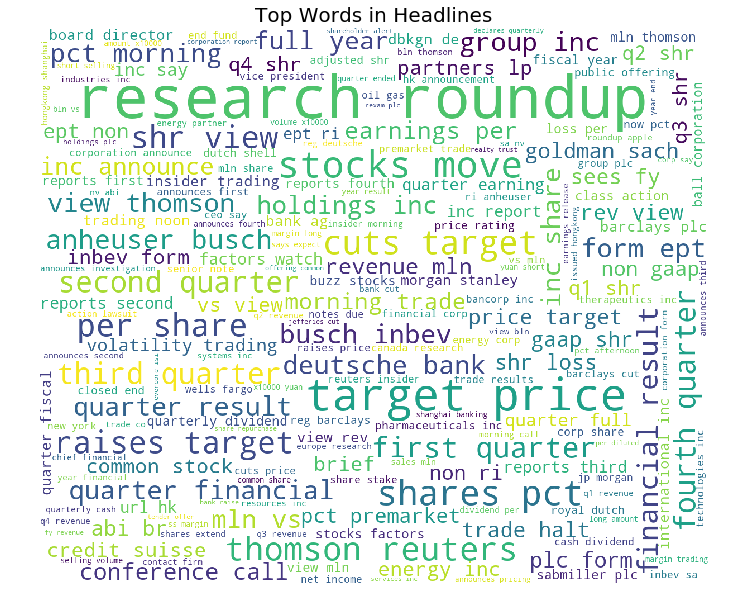

In [3]:
text = ''.join(news_data['headline'].str.lower().values[-1000000:])
wordcloud = WordCloud(max_font_size = None, background_color = 'white',\
                     width = 1200, height = 1000).generate(text)
plt.figure(figsize=(12,18))
plt.imshow(wordcloud)
plt.title('Top Words in Headlines', fontsize = 20)
plt.axis('off')
plt.savefig('HeadlineWordCloud.png', bbox_inches = 'tight')
plt.show()

The above image shows the top words in the last millino headlines in the news data set.  Notice, this gives an idea of the type of articles typically found.  For instance, the term "reasearch roundup" is the name for a type of article written by Reuters.  Since Reuters has the most segments in the data set and the "research roundup" is a popular type of article to be written it is therefore a very popular phrase to see in the headlines.